In [258]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

(1000, 2)

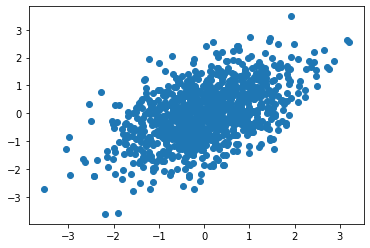

In [259]:
r = 0.5
#You can generate n identical multivariate normals 
# with this funciton, but can't generate n different
# MVNs at once.
a = scipy.stats.multivariate_normal.rvs(mean=[0,0], cov=np.array([[1, r], [r, 1]]), size=1000)
plt.plot(a[:,0], a[:,1], 'o')
a.shape

In [260]:
means_1 = scipy.stats.multivariate_normal.rvs(mean=[0,1], cov=np.array([[1, 0], [0, 1]]), size=10)
means_2 = scipy.stats.multivariate_normal.rvs(mean=[1,0], cov=np.array([[1, 0], [0, 1]]), size=10)

In [261]:
np.ones((10,2)) * [0,1]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [266]:
n_clusters = 10
finescale = 0.2
clusters_1 = (np.random.randn(n_clusters, 2) + np.ones((n_clusters,2)) * [0,2])  
clusters_2 = (np.random.randn(n_clusters, 2) + np.ones((n_clusters,2)) * [2,0])


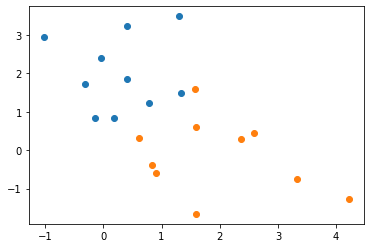

In [267]:
plt.plot(clusters_1[:,0], clusters_1[:,1], 'o')
plt.plot(clusters_2[:,0], clusters_2[:,1], 'o')
plt.savefig("SEPARABLE.png", dpi=300, bbox_inches="tight")

In [268]:
X = np.vstack([clusters_1, clusters_2])
Y = np.vstack([np.ones((10,1)), np.ones((10,1))*0])

In [269]:
X.shape, Y.shape

((20, 2), (20, 1))

In [270]:
def loss_acc(b): 
    b0 = b[0]
    b1 = b[1] 
    Ypred = np.array(((-b0 + b1 * X[:,0] + 1* X[:,1]) > 0 )+1)[:,np.newaxis]
#    print(Ypred.shape,Y.shape)
#    print(len(Ypred))
    return(len(Y)-np.sum(Ypred == Y))


In [273]:
loss_acc([0, 1]), loss_acc([3, 1]), loss_acc([-3, 1])

(20, 12, 20)

In [274]:
def grideval(func):
    xgrid = np.linspace(-10,10,110) # range for flipper length
    ygrid = np.linspace(-10,10,100)  # range for beak length
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z[i,j]= func(x)
    return(z)

In [ ]:
xax.shape

In [275]:
z=grideval(loss_acc)

(110, 100) (110, 100) (110, 100)


In [276]:
z

array([[19., 19., 19., ..., 20., 20., 20.],
       [19., 19., 19., ..., 20., 20., 20.],
       [19., 19., 19., ..., 20., 20., 20.],
       ...,
       [11., 11., 11., ..., 12., 12., 12.],
       [11., 11., 11., ..., 12., 12., 12.],
       [11., 11., 11., ..., 12., 12., 12.]])

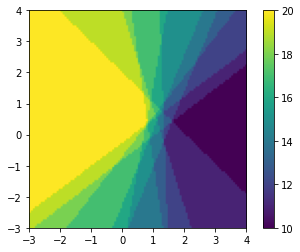

In [277]:
plt.imshow( z.T, extent = (ygrid[0], ygrid[-1], xgrid[0], xgrid[-1]), origin="lower")
plt.colorbar()

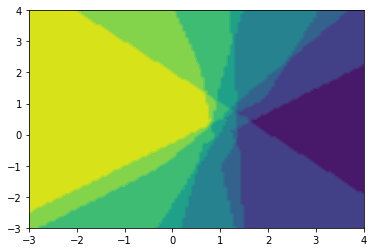

In [278]:
CS = plt.contourf(xax, yax, z) # , levels=[0, 0.25, 0.5, 0.75, 1.0], cmap="seismic")
CS = plt.contour(xax, yax, z, levels=6) 

#plt.colorbar(cmap="seismic")
#cbar = fig1.colorbar(CS)
#cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
#cbar.add_lines(CS2)

In [ ]:
loss_acc([-2, -3]), loss_acc([-2, 1])

In [279]:
def logistic(z1):
    return(1/ (1+np.exp(-z1)))

In [282]:
def loss_ssq(b): 
    b0 = b[0]
    b1 = b[1] 
    Ypred = np.array(-b0 + b1 * X[:,0] + 1* X[:,1])[:,np.newaxis]
#    print(Ypred.shape,Y.shape)
#    print(len(Ypred))
    total = (Y-Ypred)**2
    #print(Y, Ypred)
    return(np.sum(total))

In [283]:
z2 = grideval(loss_ssq)

(110, 100) (110, 100) (110, 100)


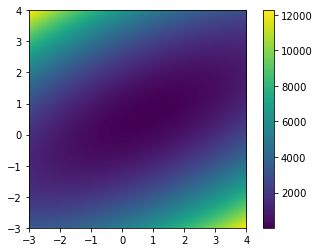

In [284]:
plt.imshow( z2.T, extent = (ygrid[0], ygrid[-1], xgrid[0], xgrid[-1]), origin="lower")
plt.colorbar()

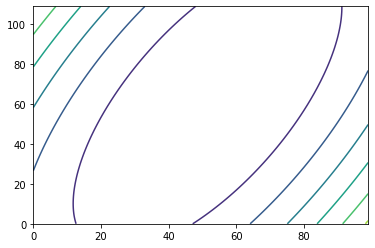

In [285]:
plt.contour(z2)

In [286]:
def loss_log(b): 
    b0 = b[0]
    b1 = b[1] 
    Ypred = np.array(-b0 + b1 * X[:,0] + 1* X[:,1])[:,np.newaxis]
#    print(Ypred.shape,Y.shape)
    total = (1-Y)* np.log(logistic(Ypred)) +Y*np.log(1-logistic(Ypred))
    #print(Y, Ypred)
    return(-np.sum(total))

In [287]:
z3 = grideval(loss_log)

(110, 100) (110, 100) (110, 100)


<ipython-input-286-7174d934c3af>:6: RuntimeWarning: divide by zero encountered in log
  total = (1-Y)* np.log(logistic(Ypred)) +Y*np.log(1-logistic(Ypred))
<ipython-input-286-7174d934c3af>:6: RuntimeWarning: invalid value encountered in multiply
  total = (1-Y)* np.log(logistic(Ypred)) +Y*np.log(1-logistic(Ypred))


<ipython-input-288-061933c13289>:2: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(z3, color="black")


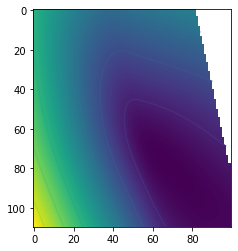

In [288]:
plt.imshow(z3)
plt.contour(z3, color="black")

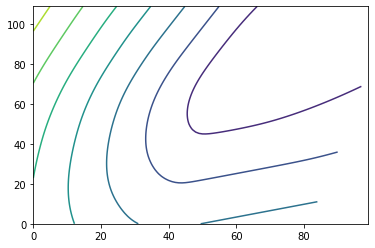

In [289]:
plt.contour(z3)

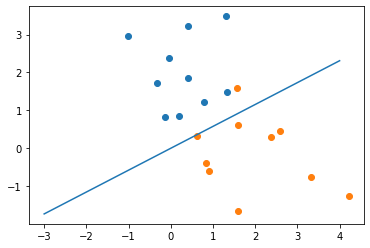

In [290]:

xfine= np.linspace(xgrid[0], xgrid[-1], 20)
plt.scatter(clusters_1[:,0], clusters_1[:,1])
plt.scatter(clusters_2[:,0], clusters_2[:,1])
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        b0 = xgrid[i]; b1=ygrid[j]
#        print(b0,b1, z2[i,j])
        yfine = -b0 * -b1 * xfine
        if z2[i,j]== np.min(z2):
            plt.plot(xfine, yfine)

(-2.0, 4.0)

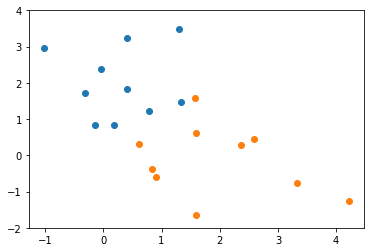

In [292]:
xfine= np.linspace(xgrid[0], xgrid[-1], 20)

for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        b0 = xgrid[i]; b1=ygrid[j]
#        print(b0,b1, z2[i,j])
        yfine = -0.5 +b0 - b1 * xfine
#        yfine = -b0/b1 +  xfine/b1

    if z[i,j]== np.min(z):
            plt.plot(xfine, yfine, color="black", alpha=0.01)
plt.scatter(clusters_1[:,0], clusters_1[:,1])
plt.scatter(clusters_2[:,0], clusters_2[:,1])
plt.ylim(-2,4)

In [293]:
np.max(z), np.min(z)

(20.0, 10.0)

In [294]:
np.sum(z==np.max(z))

3434

In [295]:
z.shape

(110, 100)

In [296]:
np.sum(z==np.min(z))

1127

In [297]:
loss_log([1,1]), loss_log([2,2]), loss_log([3,3]), loss_log([4,4])

(21.512380122452456, 17.342863191606572, 15.601569932172808, 15.03379319764575)

In [300]:
from scipy.optimize import minimize
fit = minimize(loss_log, [2,2]) 
fit

      fun: 14.596005819977387
 hess_inv: array([[2.01417771, 1.66731464],
       [1.66731464, 1.92690021]])
      jac: array([-8.34465027e-07,  2.62260437e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([4.58904112, 3.86356047])

In [ ]:
yfit = -0.5 +fit.x[0] - fit.x[1] * xfine


In [ ]:
plt.plot(xfine, yfit, color="black")
plt.scatter(clusters_1[:,0], clusters_1[:,1])
plt.scatter(clusters_2[:,0], clusters_2[:,1])
